In [1]:
import pandas as pd

df = pd.read_csv('./datasets/Admission_Predict_Ver1.1.csv')
df.drop(columns=['Serial No.'], inplace=True)
X = df.drop(columns=['Chance of Admit '])
y = df['Chance of Admit ']

In [59]:
X.to_numpy()[0]

array([3.000e+00, 1.000e+00, 1.180e+03, 5.650e+03, 1.000e+00, 0.000e+00,
       0.000e+00, 3.000e+00, 7.000e+00, 1.180e+03, 0.000e+00, 1.955e+03,
       0.000e+00, 1.340e+03, 5.650e+03])

In [54]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [38]:
X = X.to_numpy()
y = y.to_numpy()

In [19]:
X.shape

(500, 7)

In [2]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=13)

In [3]:
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, AdamW, Adadelta, Adagrad, Adamax, Adafactor, Nadam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanSquaredError as MSE

loss = MeanSquaredError()
metrics=['mae']

otimizadores = [SGD(), 
                SGD(momentum=0.9), 
                SGD(nesterov=True, momentum=0.9), 
                RMSprop(), 
                RMSprop(momentum=0.9),
                Adam(),
                Adam(amsgrad=True),
                AdamW(),
                Adadelta(), 
                Adagrad(),
                Adamax(),
                Nadam(),
                Adafactor()
                ]

historico = []
for otimizador in otimizadores:
    modelo = Sequential()

    modelo.add(Dense(4, kernel_initializer="normal", input_dim=7, activation='relu'))
    modelo.add(Dropout(0.2))
    modelo.add(Dense(4, kernel_initializer="normal", activation='relu'))
    modelo.add(Dropout(0.2))
    modelo.add(Dense(1, kernel_initializer="normal", activation='linear'))


    modelo.compile(
        optimizer=otimizador,
        loss='mean_squared_error',
        metrics=metrics
    )
    
    aux = modelo.fit(X_treino, y_treino, batch_size=500,verbose=0 ,epochs=80, validation_data=(X_teste, y_teste))
    historico.append(aux)

c:\Users\fabio\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\fabio\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\fabio\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

In [24]:
epochs = np.arange(1, 60+1)

In [4]:
import numpy as np

epochs = np.arange(1, 80+1)


otimizadores[1].name = 'SGD com momentum'
otimizadores[2].name = 'SGD com nesterov momentum'
otimizadores[4].name = 'RMSprop com nesterov momentum'
otimizadores[6].name = 'AmsGrad'
len(epochs)

80

In [75]:
df = pd.DataFrame(data=[otimizador.name for otimizador in otimizadores], columns=['Otimizador'])

,Otimizador
0,SGD
1,SGD com momentum
2,SGD com nesterov momentum
3,rmsprop
4,RMSprop com nesterov momentum
5,adam
6,AmsGrad
7,adamw
8,adadelta
9,adagrad


In [69]:
for i, otimizador in enumerate(historico):
    for keys in otimizador.history.keys():
        {otimizadores[i].name : }
    #maiores_valores_mae[otimizadores[i].name] = max(otimizador.history['mae'])

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [19]:
media_maiores_valores_loss = sum(value for value in maiores_valores_loss.values() if isinstance(value, (int, float))) / len(maiores_valores_loss)
media_maiores_valores_mae = sum(value for value in maiores_valores_mae.values() if isinstance(value, (int, float))) / len(maiores_valores_loss)

In [37]:
import pandas as pd

maiores_valores = pd.DataFrame.from_dict(maiores_valores_loss, orient='index')
maiores_valores

,0
SGD,0.593960
SGD com momentum,0.956791
SGD com nesterov momentum,2960.297119
rmsprop,1.859160
RMSprop com nesterov momentum,0.164418
adam,0.732177
AmsGrad,0.258929
adamw,2.403159
adadelta,0.893676
adagrad,0.631383


In [23]:
mediana_quadratica_loss = np.median(maiores_valores_loss)
mediana_quadratica_mae = np.median(maiores_valores_mae)

TypeError: unsupported operand type(s) for /: 'dict' and 'int'

C:\Users\fabio\AppData\Local\Temp\ipykernel_2864\1279557244.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('Set1', len(historico))


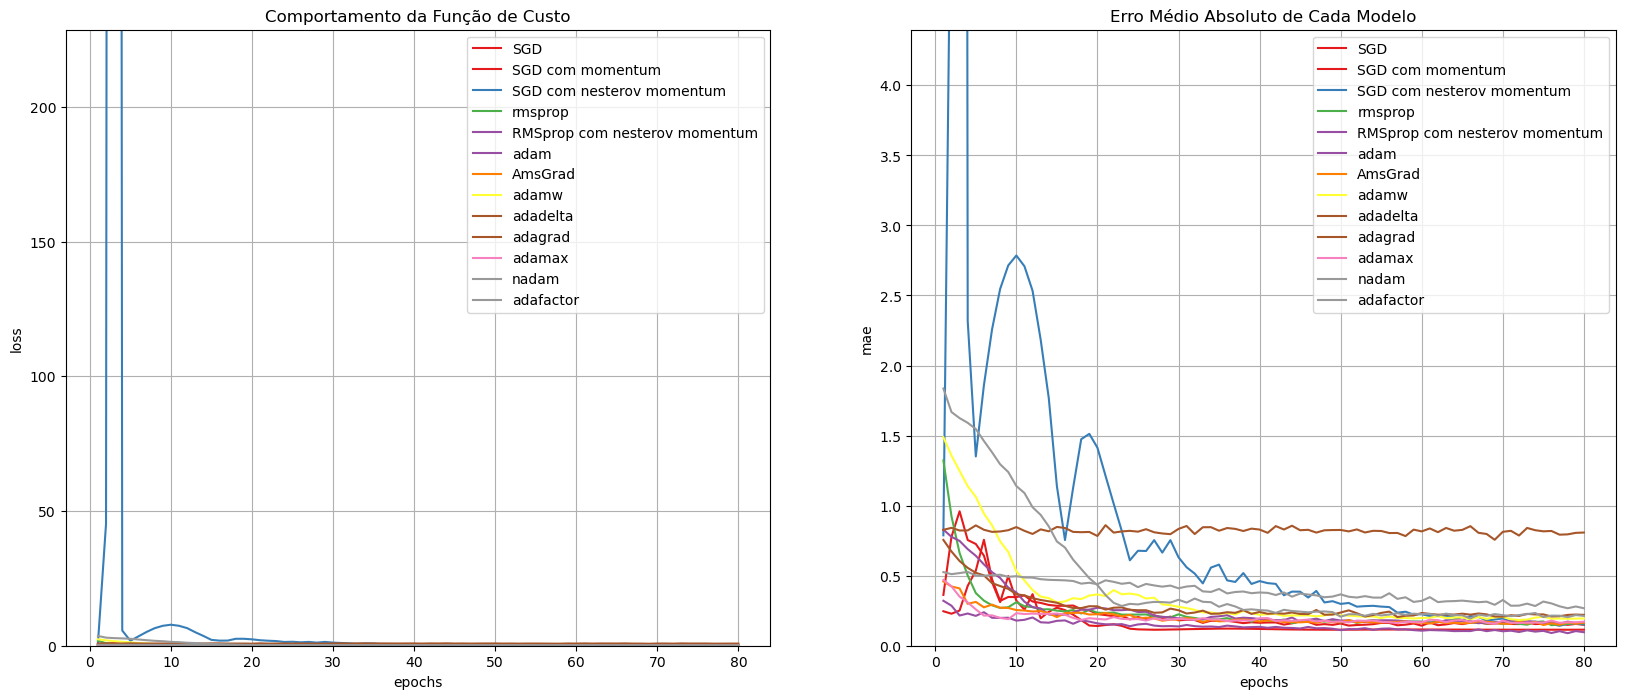

In [21]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

colors = cm.get_cmap('Set1', len(historico))

fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(20, 8))

for i, otimizador in enumerate(historico):
    ax.plot(epochs, otimizador.history['loss'], label=otimizadores[i].name, color=colors(i))
    ax.grid(True)
    ax.legend()
    ax.set_title('Comportamento da Função de Custo')
    ax.set_xlabel('epochs')
    ax.set_ylabel('loss')
    ax.set_ylim(0, mediana_loss)

    ax2.plot(epochs, otimizador.history['mae'], label=otimizadores[i].name, color=colors(i))
    ax2.grid(True)
    ax2.legend()
    ax2.set_title('Erro Médio Absoluto de Cada Modelo')
    ax2.set_xlabel('epochs')
    ax2.set_ylabel('mae')
    ax2.set_ylim(0, media_maiores_valores_mae)

plt.show()

Acredito que SGD com nesterov momentum se performou melhor do que os outros

In [6]:
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, AdamW, Adadelta, Adagrad, Adamax, Adafactor, Nadam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanSquaredError as MSE

modelo = Sequential()

modelo.add(Dense(20, kernel_initializer="normal", input_dim=7, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(20, kernel_initializer="normal", activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(1, kernel_initializer="normal", activation='linear'))


modelo.compile(
    optimizer=SGD(nesterov=True, momentum=0.9),
    loss='mean_squared_error',
    metrics=['mae']
)

historico = modelo.fit(X_treino, y_treino, batch_size=500,verbose=1 ,epochs=60, validation_data=(X_teste, y_teste))

Epoch 1/60


c:\Users\fabio\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.5193 - mae: 0.6774 - val_loss: 3.6573 - val_mae: 1.9111
Epoch 2/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 5.1409 - mae: 2.0196 - val_loss: 1.1700 - val_mae: 1.0716
Epoch 3/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 1.2378 - mae: 1.0812 - val_loss: 3.1692 - val_mae: 1.7786
Epoch 4/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 6.0238 - mae: 2.1915 - val_loss: 0.6683 - val_mae: 0.8059
Epoch 5/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.6916 - mae: 0.8193 - val_loss: 0.6704 - val_mae: 0.8073
Epoch 6/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.6938 - mae: 0.8207 - val_loss: 0.6460 - val_mae: 0.7920
Epoch 7/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.6690 - mae: 0.8054 - val_loss: 0.6000 - val_mae: 0.7624
Epoch 8/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.6222 - mae: 0.7758 - val_loss: 0.5382 - val_mae: 0.7207
Epoch 9/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.5593 - mae: 0.7342 - val_loss: 0.4

Verficando a possibilidade de overfitting

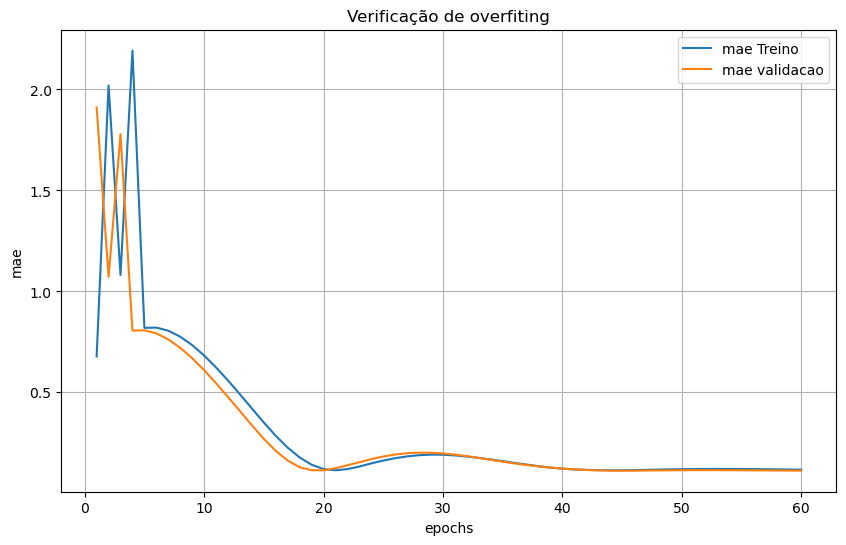

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(epochs, historico.history['mae'], label='mae Treino')
plt.plot(epochs, historico.history['val_mae'], label='mae validacao')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('mae')
plt.grid(True)
plt.title('Verificação de overfiting')
plt.show()